In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
training_df = pd.read_csv('/content/drive/MyDrive/Practicum/training_df.csv')
training_df

,Unnamed: 0,player_name,team_abbreviation,age,body_fat_perct,FGA_per_MP,season,Pos,MP,TRB,Date,Major anatomical areas,Anatomical sub-areas,Notes
0,0,Jameer Nelson,ORL,29.0,21.118002,0.360656,2010-11,PG,30.5,3.0,2011-03-28,Lower extremity,Knee area,sprained left knee (DNP)
1,1,James Anderson,SAS,22.0,18.715203,0.281818,2010-11,SF,11.0,0.9,2010-11-11,Lower extremity,Foot area,stress fracture in right foot (out indefinitely)
2,2,Jamal Crawford,ATL,31.0,18.585624,0.380795,2010-11,SG,30.2,1.7,2010-11-03,Lower extremity,Toes area,turf toe (DNP)
3,3,J.J. Redick,ORL,27.0,17.126905,0.296875,2010-11,SG,25.6,1.9,2011-01-31,Upper extremity,Shoulder area,sore left shoulder (DTD)
4,4,J.J. Redick,ORL,27.0,17.126905,0.296875,2010-11,SG,25.6,1.9,2011-03-11,Head-Neck-Trunk,Abdominal area,lower abdominal strain (DNP)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,7767,Noah Vonleh,DEN,24.0,21.852371,0.247619,2019-20,C,10.5,3.4,2019-12-30,Head-Neck-Trunk,Pelvic area,bruised gluteus (DTD)
4219,7768,Noah Vonleh,DEN,24.0,21.852371,0.247619,2019-20,C,10.5,3.4,2020-02-27,Lower extremity,Ankle area,right ankle injury (DTD)
4220,7769,Nicolas Claxton,BKN,21.0,14.519662,0.256000,2019-20,C,12.5,2.9,2019-12-10,Lower extremity,Thigh area,left hamstring injury (DTD)
4221,7770,Norman Powell,TOR,27.0,22.333275,0.404930,2019-20,SG,28.4,3.7,2019-12-19,Upper extremity,Shoulder area,left shoulder subluxation (out indefinitely)


In [4]:
training_df.describe()

,Unnamed: 0,age,body_fat_perct,FGA_per_MP,MP,TRB
count,4223.000000,4223.000000,4223.000000,4223.000000,4223.000000,4223.000000
mean,4678.836135,27.306180,19.583290,0.345564,23.868672,4.283400
std,2266.700713,4.277421,2.487535,0.099692,8.199232,2.513964
min,0.000000,19.000000,11.880780,0.000000,0.700000,0.000000
25%,2770.000000,24.000000,17.989545,0.276195,17.900000,2.500000
50%,5240.000000,27.000000,19.550790,0.340336,24.700000,3.700000
75%,6568.000000,30.000000,21.257774,0.408560,30.800000,5.400000
max,7771.000000,41.000000,30.860059,1.000000,40.300000,16.000000


In [5]:
training_df.drop(columns=['Unnamed: 0'],inplace=True)

###Imbalance in the Data set for prediction

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

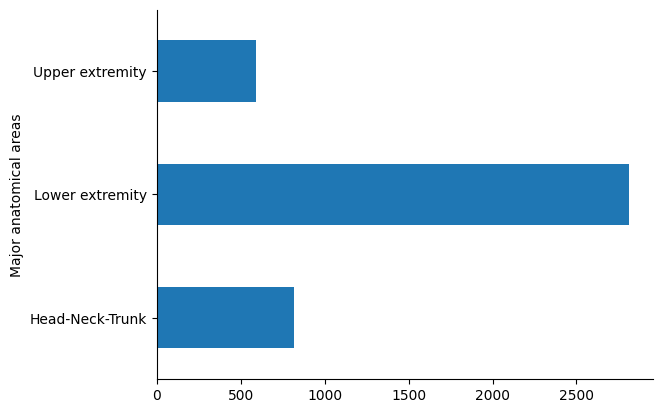

In [8]:
training_df.groupby('Major anatomical areas').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
training_df = training_df.sort_values(by=['player_name', 'Date'])
training_df

,player_name,team_abbreviation,age,body_fat_perct,FGA_per_MP,season,Pos,MP,TRB,Date,Major anatomical areas,Anatomical sub-areas,Notes
783,A.J. Price,WAS,26.0,17.835740,0.321429,2012-13,PG,22.4,2.0,2012-12-11,Upper extremity,"Hand, Thumb & Fingers area",fractured right hand (DNP)
784,A.J. Price,WAS,26.0,17.835740,0.321429,2012-13,PG,22.4,2.0,2013-03-13,Head-Neck-Trunk,Abdominal area,groin injury (DNP)
785,A.J. Price,WAS,26.0,17.835740,0.321429,2012-13,PG,22.4,2.0,2013-03-16,Lower extremity,Knee area,sore right knee (DNP)
713,Aaron Brooks,HOU,28.0,15.491044,0.319149,2012-13,PG,18.8,1.5,2012-12-30,Lower extremity,Ankle area,sore left ankle (DNP)
1561,Aaron Brooks,DEN,29.0,15.651044,0.375000,2013-14,PG,21.6,1.9,2014-01-15,Lower extremity,Knee area,tendinitis in knee (DNP)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,Zhou Qi,HOU,22.0,12.584961,0.260870,2017-18,C,6.9,1.2,2018-03-14,Head-Neck-Trunk,Chest area,rib injury (DTD)
3444,Zhou Qi,HOU,23.0,12.744961,1.000000,2018-19,PF,1.0,0.0,2018-10-17,Lower extremity,Knee area,sprained left knee (DTD)
3445,Zhou Qi,HOU,23.0,12.744961,1.000000,2018-19,PF,1.0,0.0,2018-11-26,Lower extremity,Ankle area,sprained left ankle (DTD)
4139,Zion Williamson,NOP,19.0,29.318593,0.539568,2019-20,PF,27.8,6.3,2019-10-18,Lower extremity,Knee area,torn meniscus in right knee (out indefinitely)


### Seasonwise number of musculoskeltal injuries

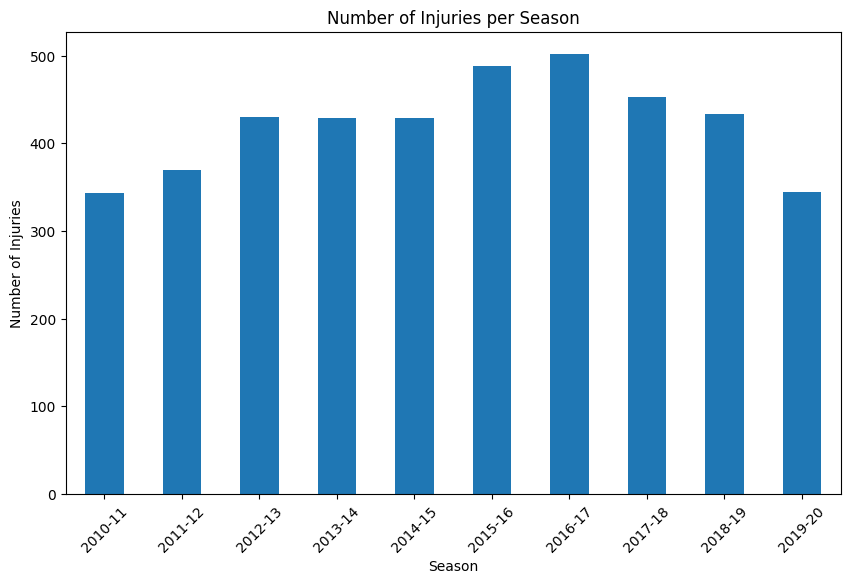

In [13]:
season_counts = training_df.groupby('season').size()

# Plot the bar plot
season_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Injuries per Season')
plt.xlabel('Season')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

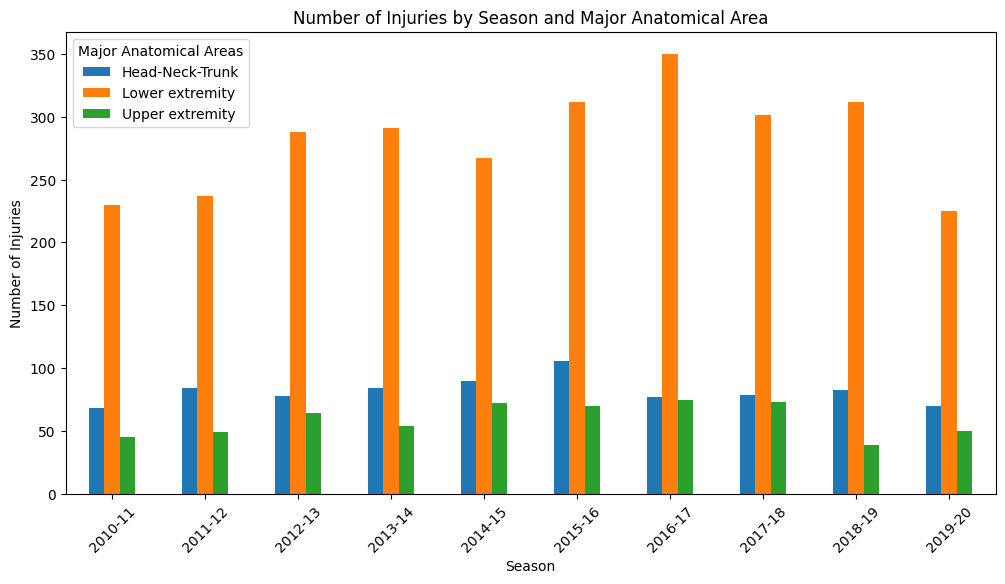

In [17]:
grouped_counts = training_df.groupby(['season', 'Major anatomical areas']).size().unstack(fill_value=0)

# Plot the grouped bar plot
grouped_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Injuries by Season and Major Anatomical Area')
plt.xlabel('Season')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.legend(title='Major Anatomical Areas')

plt.show()

In [6]:
len(set(training_df['player_name']))

858

In [10]:
unique_players_szn = training_df.groupby(['player_name', 'season']).first().reset_index()
unique_players_szn

,player_name,season,team_abbreviation,age,body_fat_perct,FGA_per_MP,Pos,MP,TRB,Date,Major anatomical areas,Anatomical sub-areas,Notes
0,A.J. Price,2012-13,WAS,26.0,17.835740,0.321429,PG,22.4,2.0,2012-12-11,Upper extremity,"Hand, Thumb & Fingers area",fractured right hand (DNP)
1,Aaron Brooks,2012-13,HOU,28.0,15.491044,0.319149,PG,18.8,1.5,2012-12-30,Lower extremity,Ankle area,sore left ankle (DNP)
2,Aaron Brooks,2013-14,DEN,29.0,15.651044,0.375000,PG,21.6,1.9,2014-01-15,Lower extremity,Knee area,tendinitis in knee (DNP)
3,Aaron Brooks,2015-16,CHI,31.0,15.971044,0.422360,PG,16.1,1.5,2015-11-19,Lower extremity,Thigh area,strained left hamstring (DTD)
4,Aaron Brooks,2016-17,IND,32.0,16.131044,0.333333,PG,13.8,1.1,2016-10-24,Lower extremity,Knee area,sore knee (DTD)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,Zaza Pachulia,2018-19,DET,35.0,24.561901,0.217054,C,12.9,3.9,2019-01-01,Lower extremity,Shin area,right leg injury (DTD)
2543,Zhaire Smith,2019-20,PHI,21.0,19.635913,0.347826,SF,4.6,0.3,2019-12-08,Lower extremity,Shin area,right leg injury (DTD)
2544,Zhou Qi,2017-18,HOU,22.0,12.584961,0.260870,C,6.9,1.2,2017-11-29,Lower extremity,Calf area,sore left calf (DTD)
2545,Zhou Qi,2018-19,HOU,23.0,12.744961,1.000000,PF,1.0,0.0,2018-10-17,Lower extremity,Knee area,sprained left knee (DTD)


<Axes: xlabel='body_fat_perct', ylabel='Count'>

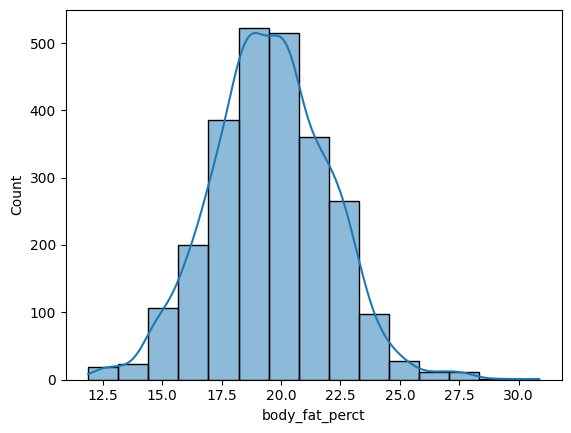

In [20]:
sns.histplot(data=unique_players_szn, x="body_fat_perct", bins=15,kde=True)

<ipython-input-25-4edd2c53b0be>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(unique_players_szn, y='body_fat_perct', x='Pos', palette='Dark2')


<Axes: xlabel='Pos', ylabel='body_fat_perct'>

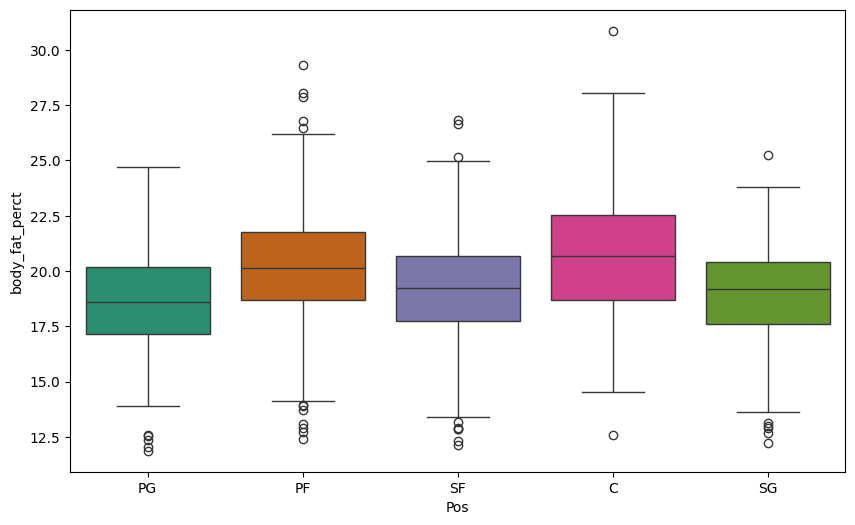

In [25]:
# @title Pos vs body_fat_perct

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (10, 1.2 * len(unique_players_szn['Pos'].unique()))
plt.figure(figsize=figsize)
sns.boxplot(unique_players_szn, y='body_fat_perct', x='Pos', palette='Dark2')


<ipython-input-28-953258b63cd7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(unique_players_szn, y='TRB', x='Pos', palette='Dark2')


<Axes: xlabel='Pos', ylabel='TRB'>

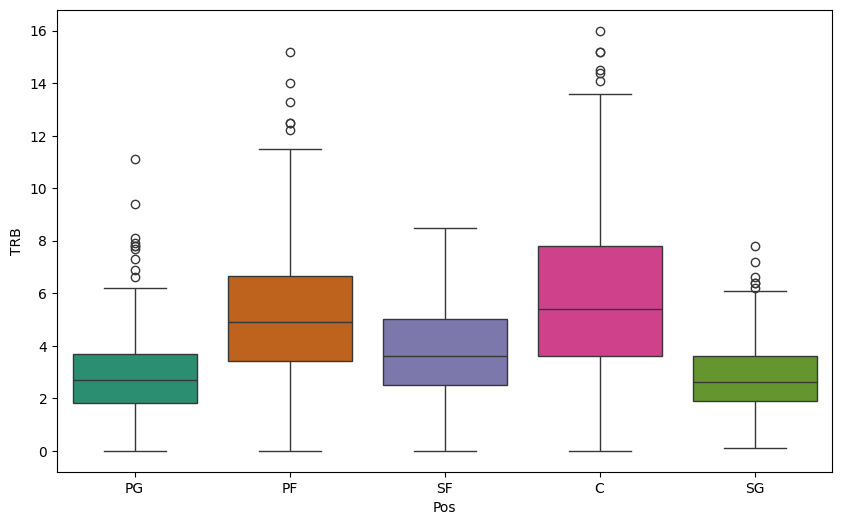

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (10, 1.2 * len(unique_players_szn['Pos'].unique()))
plt.figure(figsize=figsize)
sns.boxplot(unique_players_szn, y='TRB', x='Pos', palette='Dark2')

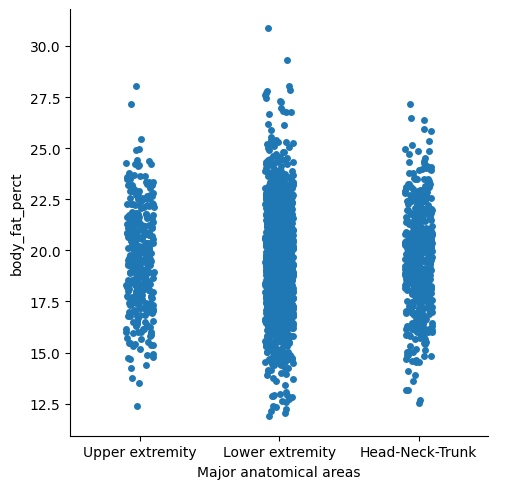

In [32]:
sns.catplot(data=unique_players_szn, y="body_fat_perct", x='Major anatomical areas')